<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/Time_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('/content/monthly-milk-production.csv', index_col='Month', parse_dates=True)
df.index.freq='MS'
df.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [32]:
df.isnull().sum().sum()

0

In [33]:
df.shape

(168, 1)

In [34]:
df.describe()

,Milk Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


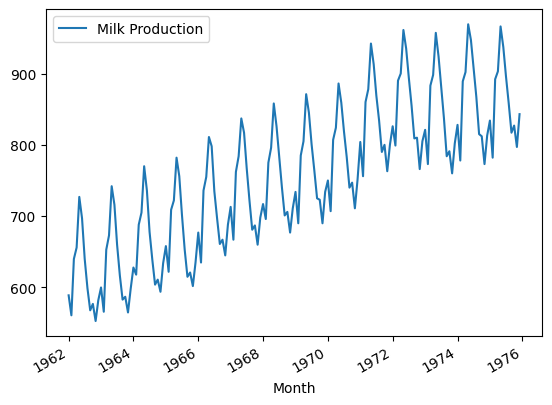

In [35]:
df.plot();

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

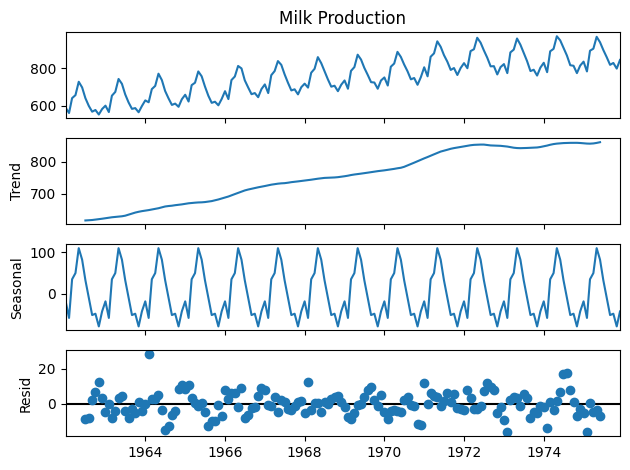

In [37]:
results = seasonal_decompose(df['Milk Production'])
results.plot();

In [38]:
train = df.iloc[:156]
test = df.iloc[156:]

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)

In [42]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [43]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [44]:
X, y = generator[0]

In [45]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [46]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [49]:
model = Sequential([
    LSTM(100, activation='relu', input_shape=(n_input, n_features)),
    Dense(1)
])

In [50]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [51]:
model.fit(generator, epochs=50)

Epoch 1/50
144/144 [==============================] - 3s 8ms/step - loss: 0.0640
Epoch 2/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0239
Epoch 3/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0209
Epoch 4/50
144/144 [==============================] - 2s 11ms/step - loss: 0.0205
Epoch 5/50
144/144 [==============================] - 2s 12ms/step - loss: 0.0128
Epoch 6/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0101
Epoch 7/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0129
Epoch 8/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0075
Epoch 9/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0073
Epoch 10/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 11/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0062
Epoch 12/50
144/144 [==============================] - 1s 8ms/step - loss: 0.0065
Epoch 13/50
144/144 [==